In [1]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [10]:
import pandas as pd 
df=pd.read_csv('imdb_top_1000.csv', encoding='utf8')
df['Runtime']=df['Runtime'].str.replace('min','') #remove column
df = df.dropna(subset=["Runtime"]) #dropnNaN because was affecting conversion to int
df['Runtime'] = df['Runtime'].astype(int) #convert to int
df.sort_values(["Runtime"], 
                    axis=0,
                    ascending=[True], 
                    inplace=True)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,"977,375"
567,https://m.media-amazon.com/images/M/MV5BMjMyYj...,Freaks,1932,NaN,64,"Drama, Horror",7.9,A circus' beautiful trapeze artist agrees to m...,80.0,Tod Browning,Wallace Ford,Leila Hyams,Olga Baclanova,Roscoe Ates,42117,NaN
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,"1,033,895"
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,"5,450,000"
717,https://m.media-amazon.com/images/M/MV5BYmYxZG...,Duck Soup,1933,NaN,69,"Comedy, Musical, War",7.8,Rufus T. Firefly is named president/dictator o...,93.0,Leo McCarey,Groucho Marx,Harpo Marx,Chico Marx,Zeppo Marx,55581,NaN


In [17]:
df['AVG_Meta_score'] = df.groupby('Runtime').Meta_score.transform('mean')
df = df.dropna(subset=["AVG_Meta_score"]) #dropnNaN because was affecting conversion to int
df.head(8)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,AVG_Meta_score
567,https://m.media-amazon.com/images/M/MV5BMjMyYj...,Freaks,1932,NaN,64,"Drama, Horror",7.9,A circus' beautiful trapeze artist agrees to m...,80.0,Tod Browning,Wallace Ford,Leila Hyams,Olga Baclanova,Roscoe Ates,42117,NaN,80.0
717,https://m.media-amazon.com/images/M/MV5BYmYxZG...,Duck Soup,1933,NaN,69,"Comedy, Musical, War",7.8,Rufus T. Firefly is named president/dictator o...,93.0,Leo McCarey,Groucho Marx,Harpo Marx,Chico Marx,Zeppo Marx,55581,NaN,93.0
719,https://m.media-amazon.com/images/M/MV5BMTQ0Nj...,Frankenstein,1931,Passed,70,"Drama, Horror, Sci-Fi",7.8,Dr. Frankenstein dares to tamper with life and...,91.0,James Whale,Colin Clive,Mae Clarke,Boris Karloff,John Boles,65341,NaN,91.0
920,https://m.media-amazon.com/images/M/MV5BMjEzMj...,The Secret of Kells,2009,NaN,71,"Animation, Adventure, Family",7.6,A young boy in a remote medieval outpost under...,81.0,Tomm Moore,Nora Twomey,Evan McGuire,Brendan Gleeson,Mick Lally,31779,"686,383",84.0
876,https://m.media-amazon.com/images/M/MV5BYjllMm...,The Invisible Man,1933,TV-PG,71,"Horror, Sci-Fi",7.7,"A scientist finds a way of becoming invisible,...",87.0,James Whale,Claude Rains,Gloria Stuart,William Harrigan,Henry Travers,30683,NaN,84.0
694,https://m.media-amazon.com/images/M/MV5BYjhhMD...,La planète sauvage,1973,U,72,"Animation, Sci-Fi",7.8,"On a faraway planet where blue giants rule, op...",73.0,René Laloux,Barry Bostwick,Jennifer Drake,Eric Baugin,Jean Topart,25229,"193,817",81.5
318,https://m.media-amazon.com/images/M/MV5BM2QwYW...,The Circus,1928,Passed,72,"Comedy, Romance",8.1,The Tramp finds work and the girl of his dream...,90.0,Charles Chaplin,Charles Chaplin,Merna Kennedy,Al Ernest Garcia,Harry Crocker,30205,NaN,81.5
462,https://m.media-amazon.com/images/M/MV5BMTEyMT...,Bronenosets Potemkin,1925,NaN,75,"Drama, History, Thriller",8.0,In the midst of the Russian Revolution of 1905...,97.0,Sergei M. Eisenstein,Aleksandr Antonov,Vladimir Barskiy,Grigoriy Aleksandrov,Ivan Bobrov,53054,"50,970",96.0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

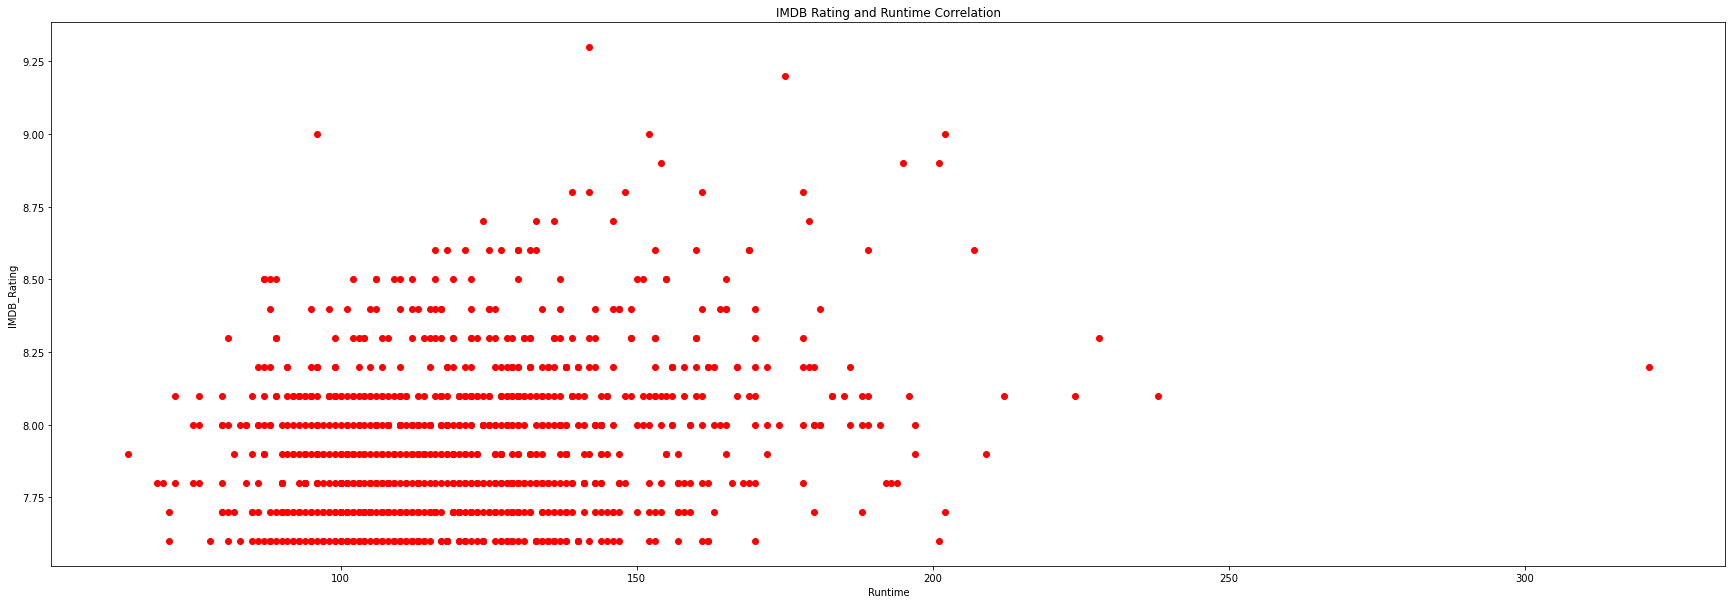

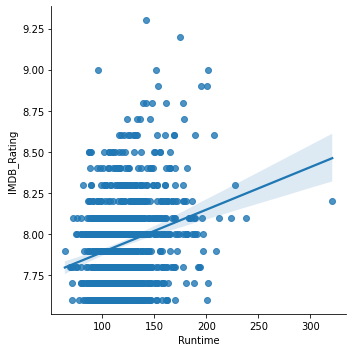

In [25]:
fig, ax = plt.subplots(figsize=(30,10))
ax.scatter(df["Runtime"], df["IMDB_Rating"], color="red")
plt.title("IMDB Rating and Runtime Correlation") 
plt.xlabel("Runtime")
plt.ylabel("IMDB_Rating") 
sns.lmplot(x="Runtime", y="IMDB_Rating", data=df); #regression line
plt.show()

In [26]:
df['IMDB_Rating'].corr(df['Runtime'])


0.2516104907293336